# 1 Датасет: NASA - Nearest Earth Objects
#### https://www.kaggle.com/datasets/sameepvani/nasa-nearest-earth-objects 

There is an infinite number of objects in the outer space. Some of them are closer than we think. Even though we might think that a distance of 70,000 Km can not potentially harm us, but at an astronomical scale, this is a very small distance and can disrupt many natural phenomena. These objects/asteroids can thus prove to be harmful. Hence, it is wise to know what is surrounding us and what can harm us amongst those. Thus, this dataset compiles the list of NASA certified asteroids that are classified as the nearest earth object.

В космосе находится бесконечное количество объектов. Некоторые из них находятся ближе, чем мы думаем. Хотя мы можем думать, что расстояние в 70 000 км не может потенциально навредить нам, но в астрономических масштабах это очень малое расстояние и может нарушить многие природные явления. Таким образом, эти объекты/астероиды могут оказаться вредными. Следовательно, разумно знать, что нас окружает и что из этого может навредить нам. Таким образом, этот набор данных составляет список сертифицированных NASA астероидов, которые классифицируются как ближайшие к Земле объекты.

- Из этого описания очевидно что объектами иследования являются околоземные объекты.
- Атрибуты объектов: id, name, est_diameter_min, est_diameter_max, relative_velocity, miss_distance, orbiting_body, sentry_object, absolute_magnitude, hazardous
- Очевидная цель этого датасета - это научиться определять опасность объекта автоматически.


In [2]:
import pandas as pd
df = pd.read_csv("..//static//csv//neo_v2.csv", sep=",")
print('количество колонок: ' + str(df.columns.size))  
print('колонки: ' + ', '.join(df.columns))

количество колонок: 10
колонки: id, name, est_diameter_min, est_diameter_max, relative_velocity, miss_distance, orbiting_body, sentry_object, absolute_magnitude, hazardous


Получение сведений о пропущенных данных

Типы пропущенных данных:
- None - представление пустых данных в Python
- NaN - представление пустых данных в Pandas
- '' - пустая строка

In [3]:
# Количество пустых значений признаков
print(df.isnull().sum())

print()

# Есть ли пустые значения признаков
print(df.isnull().any())

print()

# Процент пустых значений признаков
for i in df.columns:
    null_rate = df[i].isnull().sum() / len(df) * 100
    if null_rate > 0:
        print(f"{i} процент пустых значений: %{null_rate:.2f}")

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

id                    False
name                  False
est_diameter_min      False
est_diameter_max      False
relative_velocity     False
miss_distance         False
orbiting_body         False
sentry_object         False
absolute_magnitude    False
hazardous             False
dtype: bool



Итог: пропущеных значений нет

инфографика на сайте и в datawrangelere показывает, что в столбцах orbiting_body и sentry_object у всех записей одно и тоже значение. Значит эти столбцы можно выкинуть из набора данных.

In [4]:
df = df.drop(columns=['orbiting_body'])
df = df.drop(columns=['sentry_object'])
print('количество колонок: ' + str(df.columns.size))  
print('колонки: ' + ', '.join(df.columns))

количество колонок: 8
колонки: id, name, est_diameter_min, est_diameter_max, relative_velocity, miss_distance, absolute_magnitude, hazardous


я быстро посмотрев данные зашумленности не выявил

поля id и name в предсказании не помогут, но я их пока выкидывать не буду

посмотрим выбросы:

In [5]:
numeric_columns = ['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude']
for column in numeric_columns:
    if pd.api.types.is_numeric_dtype(df[column]):  # Проверяем, является ли колонка числовой
        q1 = df[column].quantile(0.25)  # Находим 1-й квартиль (Q1)
        q3 = df[column].quantile(0.75)  # Находим 3-й квартиль (Q3)
        iqr = q3 - q1  # Вычисляем межквартильный размах (IQR)

        # Определяем границы для выбросов
        lower_bound = q1 - 1.5 * iqr  # Нижняя граница
        upper_bound = q3 + 1.5 * iqr  # Верхняя граница

        # Подсчитываем количество выбросов
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_count = outliers.shape[0]

        print(f"Колонка {column}:")
        print(f"  Есть выбросы: {'Да' if outlier_count > 0 else 'Нет'}")
        print(f"  Количество выбросов: {outlier_count}")
        print(f"  Минимальное значение: {df[column].min()}")
        print(f"  Максимальное значение: {df[column].max()}")
        print(f"  1-й квартиль (Q1): {q1}")
        print(f"  3-й квартиль (Q3): {q3}\n")


Колонка est_diameter_min:
  Есть выбросы: Да
  Количество выбросов: 8306
  Минимальное значение: 0.0006089126
  Максимальное значение: 37.8926498379
  1-й квартиль (Q1): 0.0192555078
  3-й квартиль (Q3): 0.1434019235

Колонка est_diameter_max:
  Есть выбросы: Да
  Количество выбросов: 8306
  Минимальное значение: 0.00136157
  Максимальное значение: 84.7305408852
  1-й квартиль (Q1): 0.0430566244
  3-й квартиль (Q3): 0.320656449

Колонка relative_velocity:
  Есть выбросы: Да
  Количество выбросов: 1574
  Минимальное значение: 203.34643253
  Максимальное значение: 236990.1280878666
  1-й квартиль (Q1): 28619.02064490995
  3-й квартиль (Q3): 62923.60463276395

Колонка miss_distance:
  Есть выбросы: Нет
  Количество выбросов: 0
  Минимальное значение: 6745.532515957
  Максимальное значение: 74798651.4521972
  1-й квартиль (Q1): 17210820.23576468
  3-й квартиль (Q3): 56548996.45139917

Колонка absolute_magnitude:
  Есть выбросы: Да
  Количество выбросов: 101
  Минимальное значение: 9.23
  М

построим графики в надежде найти какие то зависимости опасности от других колонок

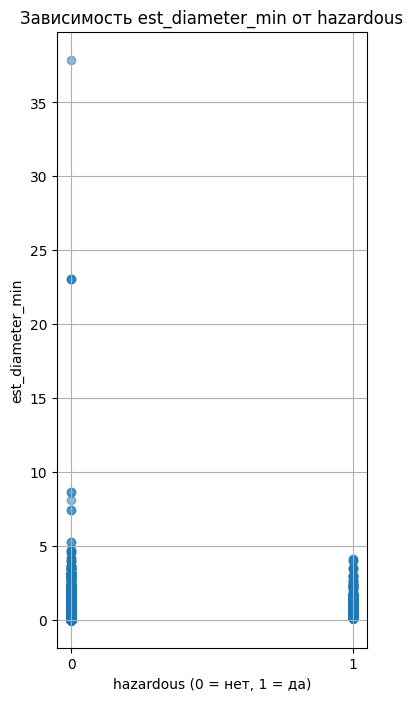

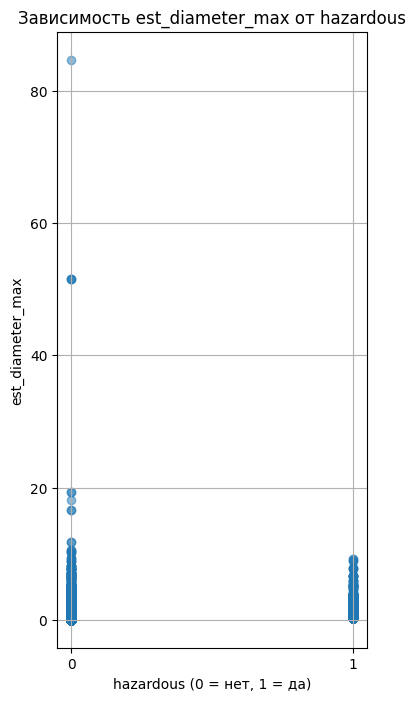

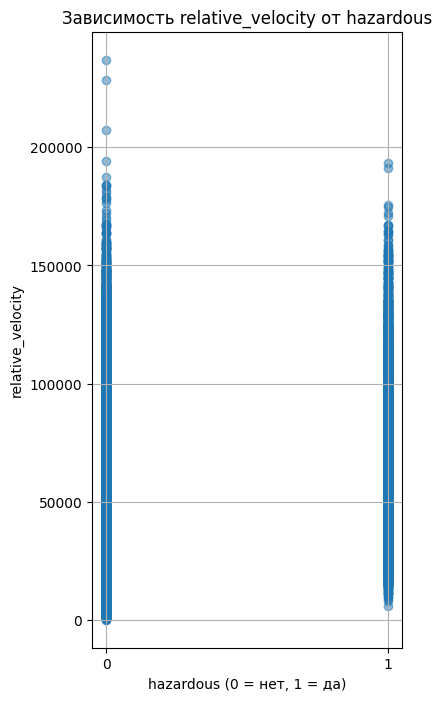

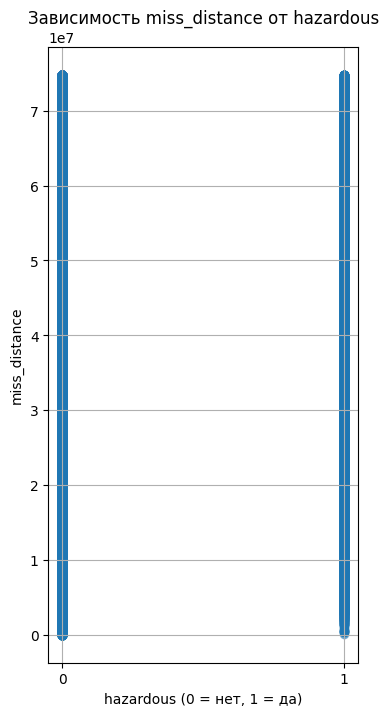

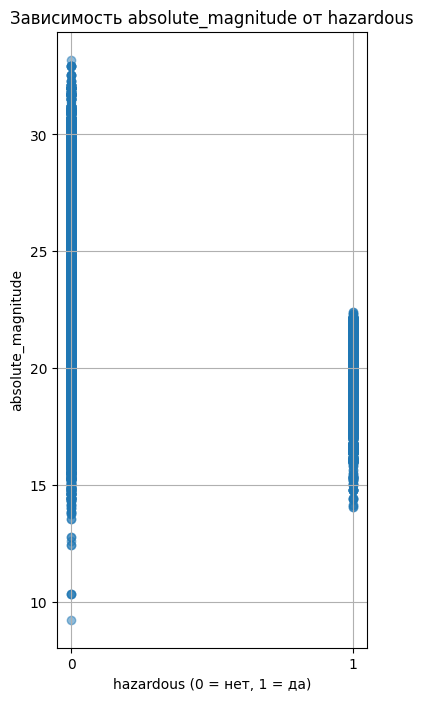

In [6]:
import matplotlib.pyplot as plt

# Список числовых колонок, для которых мы будем строить графики
numeric_columns = ['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude']

# Создание диаграмм зависимости
for column in numeric_columns:
    plt.figure(figsize=(4, 8))  # Установка размера графика
    plt.scatter(df['hazardous'], df[column], alpha=0.5)  # Создаем диаграмму рассеяния
    plt.title(f'Зависимость {column} от hazardous')
    plt.xlabel('hazardous (0 = нет, 1 = да)')
    plt.ylabel(column)
    plt.xticks([0, 1])  # Установка меток по оси X
    plt.grid()  # Добавление сетки для удобства восприятия
    plt.show()  # Отображение графика

Создадим выборки данных. разбивать будем относительно параметра опасный, ведь это тот самый параметр по которому наша выборка разбивается на классы. И собственно его нам и надо будет предсказывать

In [7]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [8]:
# Функция для создания выборок
from sklearn.model_selection import train_test_split

def split_stratified_into_train_val_test(
    df_input,
    stratify_colname="y",
    frac_train=0.6,
    frac_val=0.15,
    frac_test=0.25,
    random_state=None,
):
    """
    Splits a Pandas dataframe into three subsets (train, val, and test)
    following fractional ratios provided by the user, where each subset is
    stratified by the values in a specific column (that is, each subset has
    the same relative frequency of the values in the column). It performs this
    splitting by running train_test_split() twice.

    Parameters
    ----------
    df_input : Pandas dataframe
        Input dataframe to be split.
    stratify_colname : str
        The name of the column that will be used for stratification. Usually
        this column would be for the label.
    frac_train : float
    frac_val   : float
    frac_test  : float
        The ratios with which the dataframe will be split into train, val, and
        test data. The values should be expressed as float fractions and should
        sum to 1.0.
    random_state : int, None, or RandomStateInstance
        Value to be passed to train_test_split().

    Returns
    -------
    df_train, df_val, df_test :
        Dataframes containing the three splits.
    """

    if frac_train + frac_val + frac_test != 1.0:
        raise ValueError(
            "fractions %f, %f, %f do not add up to 1.0"
            % (frac_train, frac_val, frac_test)
        )

    if stratify_colname not in df_input.columns:
        raise ValueError("%s is not a column in the dataframe" % (stratify_colname))

    X = df_input  # Contains all columns.
    y = df_input[
        [stratify_colname]
    ]  # Dataframe of just the column on which to stratify.

    # Split original dataframe into train and temp dataframes.
    df_train, df_temp, y_train, y_temp = train_test_split(
        X, y, stratify=y, test_size=(1.0 - frac_train), random_state=random_state
    )

    # Split the temp dataframe into val and test dataframes.
    relative_frac_test = frac_test / (frac_val + frac_test)
    df_val, df_test, y_val, y_test = train_test_split(
        df_temp,
        y_temp,
        stratify=y_temp,
        test_size=relative_frac_test,
        random_state=random_state,
    )

    assert len(df_input) == len(df_train) + len(df_val) + len(df_test)

    return df_train, df_val, df_test

hazardous
False    81996
True      8840
Name: count, dtype: int64

Обучающая выборка:  (54501, 6)
hazardous
False    49197
True      5304
Name: count, dtype: int64


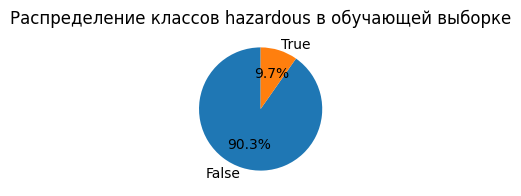

Контрольная выборка:  (18167, 6)
hazardous
False    16399
True      1768
Name: count, dtype: int64


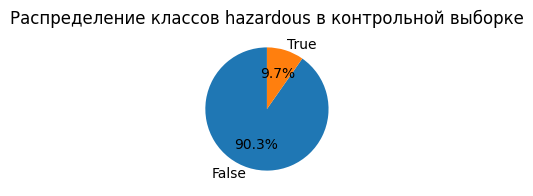

Тестовая выборка:  (18168, 6)
hazardous
False    16400
True      1768
Name: count, dtype: int64


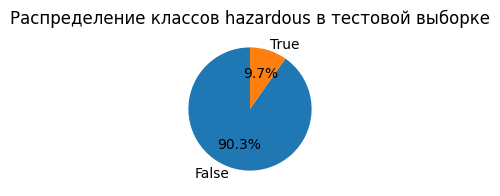

In [14]:
# Вывод распределения количества наблюдений по меткам (классам)
print(df.hazardous.value_counts())
print()


data = df[['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude', 'hazardous']].copy()

df_train, df_val, df_test = split_stratified_into_train_val_test(
   data, stratify_colname="hazardous", frac_train=0.60, frac_val=0.20, frac_test=0.20
)

print("Обучающая выборка: ", df_train.shape)
print(df_train.hazardous.value_counts())
hazardous_counts = df_train['hazardous'].value_counts()
plt.figure(figsize=(2, 2))# Установка размера графика
plt.pie(hazardous_counts, labels=hazardous_counts.index, autopct='%1.1f%%', startangle=90)# Построение круговой диаграммы
plt.title('Распределение классов hazardous в обучающей выборке')# Добавление заголовка
plt.show()# Отображение графика

print("Контрольная выборка: ", df_val.shape)
print(df_val.hazardous.value_counts())
hazardous_counts = df_val['hazardous'].value_counts()
plt.figure(figsize=(2, 2))
plt.pie(hazardous_counts, labels=hazardous_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение классов hazardous в контрольной выборке')
plt.show()

print("Тестовая выборка: ", df_test.shape)
print(df_test.hazardous.value_counts())
hazardous_counts = df_test['hazardous'].value_counts()
plt.figure(figsize=(2, 2))
plt.pie(hazardous_counts, labels=hazardous_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение классов hazardous в тестовой выборке')
plt.show()

распределение плохое, соотношение классов сильно смещено, это может привести к проблемам в обучении модели, так как модель будет обучаться в основном на одном классе. В таких случаях стоит рассмотреть методы аугментации данных.

аугментация данных оверсемплингом(Этот метод увеличивает количество примеров меньшинства)

In [15]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


Обучающая выборка после oversampling:  (100447, 6)
hazardous
True     51250
False    49197
Name: count, dtype: int64


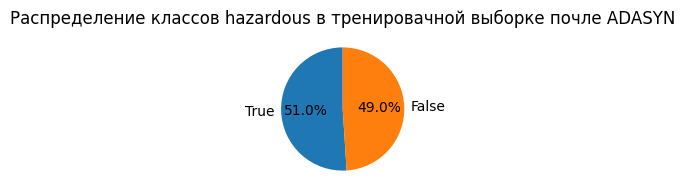

In [16]:
from imblearn.over_sampling import ADASYN

# Создание экземпляра ADASYN
ada = ADASYN()

# Применение ADASYN
X_resampled, y_resampled = ada.fit_resample(df_train.drop(columns=['hazardous']), df_train['hazardous'])

# Создание нового DataFrame
df_train_adasyn = pd.DataFrame(X_resampled)
df_train_adasyn['hazardous'] = y_resampled  # Добавление целевой переменной

# Вывод информации о новой выборке
print("Обучающая выборка после oversampling: ", df_train_adasyn.shape)
print(df_train_adasyn['hazardous'].value_counts())
hazardous_counts = df_train_adasyn['hazardous'].value_counts()
plt.figure(figsize=(2, 2))
plt.pie(hazardous_counts, labels=hazardous_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение классов hazardous в тренировачной выборке после ADASYN')
plt.show()

P.S. можно было использовать ещё SMOTE, SVM-SMOTE, K-means SMOTE, SMOTE-N, SMOTE-NC, RandomOverSampler.

проведём также балансировку данных методом андерсемплинга. Этот метод помогает сбалансировать выборку, уменьшая количество экземпляров класса большинства, чтобы привести его в соответствие с классом меньшинства.

Обучающая выборка после undersampling:  (10608, 6)
hazardous
False    5304
True     5304
Name: count, dtype: int64


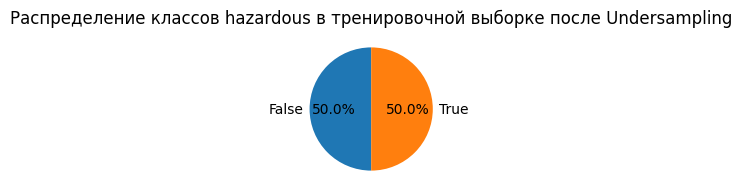

In [18]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()# Создание экземпляра RandomUnderSampler

# Применение RandomUnderSampler
X_resampled, y_resampled = rus.fit_resample(df_train.drop(columns=['hazardous']), df_train['hazardous'])

# Создание нового DataFrame
df_train_undersampled = pd.DataFrame(X_resampled)
df_train_undersampled['hazardous'] = y_resampled  # Добавление целевой переменной

# Вывод информации о новой выборке
print("Обучающая выборка после undersampling: ", df_train_undersampled.shape)
print(df_train_undersampled['hazardous'].value_counts())

# Визуализация распределения классов
hazardous_counts = df_train_undersampled['hazardous'].value_counts()
plt.figure(figsize=(2, 2))
plt.pie(hazardous_counts, labels=hazardous_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение классов hazardous в тренировочной выборке после Undersampling')
plt.show()